``**Выбранная тема: Показатели индекса S&P 500**``

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sp 500.csv")
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 01, 2022","3,936.73","4,119.28","3,610.40","3,640.47","3,640.47","88,667,050,000"
1,"Aug 01, 2022","4,112.38","4,325.28","3,954.53","3,955.00","3,955.00","78,088,520,000"
2,"Jul 01, 2022","3,781.00","4,140.15","3,721.56","4,130.29","4,130.29","68,021,140,000"
3,"Jun 01, 2022","4,149.78","4,177.51","3,636.87","3,785.38","3,785.38","86,799,060,000"
4,"May 01, 2022","4,130.61","4,307.66","3,810.32","4,132.15","4,132.15","89,128,130,000"
...,...,...,...,...,...,...,...
448,"May 01, 1985",179.83,189.98,178.35,189.55,189.55,"2,350,340,000"
449,"Apr 01, 1985",180.66,183.61,177.86,179.83,179.83,"1,981,880,000"
450,"Mar 01, 1985",181.18,183.89,176.53,180.66,180.66,"2,153,090,000"
451,"Feb 01, 1985",179.63,183.95,177.75,181.18,181.18,"2,194,620,000"


1. a. Проверка типов данных колонок
    - Приведение колонки Date к datetime
    - Колонки Open, High, Low, CLose к числовым значениям типа float
    - Колонку Volume к типу int
    - Удаление колонки Adj Close, так как она полностью соответствует колонке Close

In [33]:
data.info() 
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

columns_to_convert = ['Open', 'High', 'Low', 'Close']
for col in columns_to_convert:
    data[col] = data[col].str.replace(',', '').astype(float)
    
data['Volume'] = data['Volume'].str.replace(',', '').astype(int)

data.drop(columns=['Adj Close'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       453 non-null    object
 1   Open       453 non-null    object
 2   High       453 non-null    object
 3   Low        453 non-null    object
 4   Close      453 non-null    object
 5   Adj Close  453 non-null    object
 6   Volume     453 non-null    object
dtypes: object(7)
memory usage: 24.9+ KB


1. b. Проверка на пустые значения

In [34]:
missing_values = data.isnull().sum
duplicates = data.duplicated()

missing_values, duplicates
# Дубликатов и пустых значений не обнаружено

(<bound method DataFrame.sum of       Date   Open   High    Low  Close  Volume
 0    False  False  False  False  False   False
 1    False  False  False  False  False   False
 2    False  False  False  False  False   False
 3    False  False  False  False  False   False
 4    False  False  False  False  False   False
 ..     ...    ...    ...    ...    ...     ...
 448  False  False  False  False  False   False
 449  False  False  False  False  False   False
 450  False  False  False  False  False   False
 451  False  False  False  False  False   False
 452  False  False  False  False  False   False
 
 [453 rows x 6 columns]>,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 448    False
 449    False
 450    False
 451    False
 452    False
 Length: 453, dtype: bool)

2. Рассчитаем основные статистические показатели для числовых переменных

In [53]:
mean_values = data.mean()
median_values = data.median()
std_values = data.std()

print(f"Средние значения \n{mean_values}\n")
print(f"Медианы \n{median_values}\n")
print(f"Стандартное отклонение \n{std_values}\n")

Средние значения 
Date      2003-10-31 19:17:05.165562880
Open                        1318.239272
High                        1363.202274
Low                         1271.566932
Close                       1325.109029
Volume               43405679801.324501
dtype: object

Медианы 
Date      2003-11-01 00:00:00
Open                  1144.94
High                  1190.58
Low                   1106.42
Close                 1147.39
Volume          29981510000.0
dtype: object

Стандартное отклонение 
Date      3984 days 16:47:35.458808192
Open                       1000.221795
High                       1035.104238
Low                         962.091777
Close                      1002.905691
Volume              37694212883.436745
dtype: object



**На основе данных можно сделать следующие выводы:**
  - Средние значения показывают на средний уровень параметров, который может быть полезен для получения базовых данных
  - Медиана, в отличие от средних значений, показывает центральное значение, исключая экстремумы
  - Стандартное отклонение показывает волатильность рынка

3. Построим графики для анализа данных:
    - Динамика цен открытия и закрытия
    - Объем торгов по времени
    - Распределение изменения цен
    - Связь объема торгов с изменениями цены

Также добавим колнку Price_Change для изменения цены на месячном таймфрейме (Price_Change = Закрытие месяца - Открытие месяца)

In [56]:
data['Price_Change'] = data['Close'] - data['Open']
data

,Date,Open,High,Low,Close,Volume,Price_Change
0,2022-09-01,3936.73,4119.28,3610.40,3640.47,88667050000,-296.26
1,2022-08-01,4112.38,4325.28,3954.53,3955.00,78088520000,-157.38
2,2022-07-01,3781.00,4140.15,3721.56,4130.29,68021140000,349.29
3,2022-06-01,4149.78,4177.51,3636.87,3785.38,86799060000,-364.40
4,2022-05-01,4130.61,4307.66,3810.32,4132.15,89128130000,1.54
...,...,...,...,...,...,...,...
448,1985-05-01,179.83,189.98,178.35,189.55,2350340000,9.72
449,1985-04-01,180.66,183.61,177.86,179.83,1981880000,-0.83
450,1985-03-01,181.18,183.89,176.53,180.66,2153090000,-0.52
451,1985-02-01,179.63,183.95,177.75,181.18,2194620000,1.55


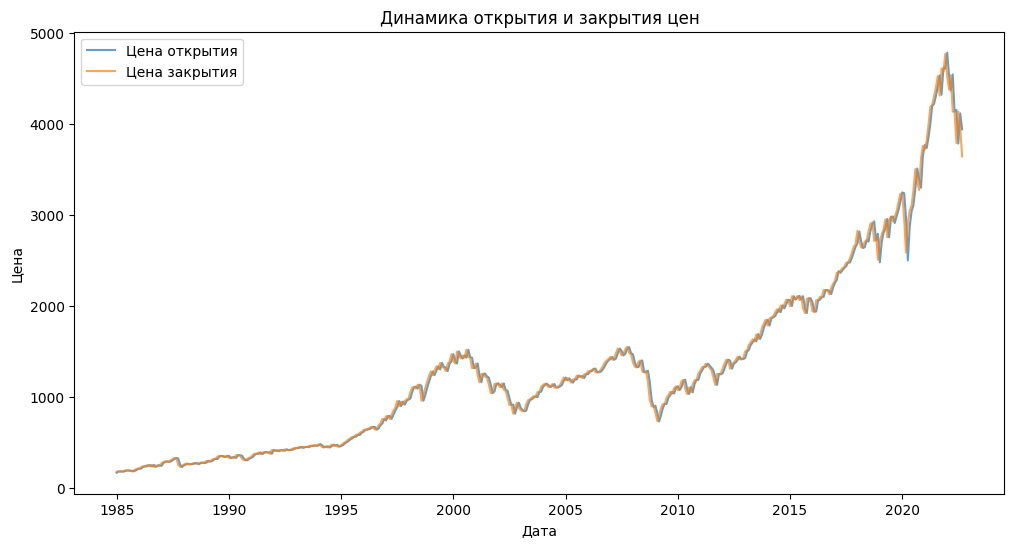

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Цена открытия', alpha=0.7)
plt.plot(data['Date'], data['Close'], label='Цена закрытия', alpha=0.7)
plt.title('Динамика открытия и закрытия цен')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend(loc='best')
plt.show()

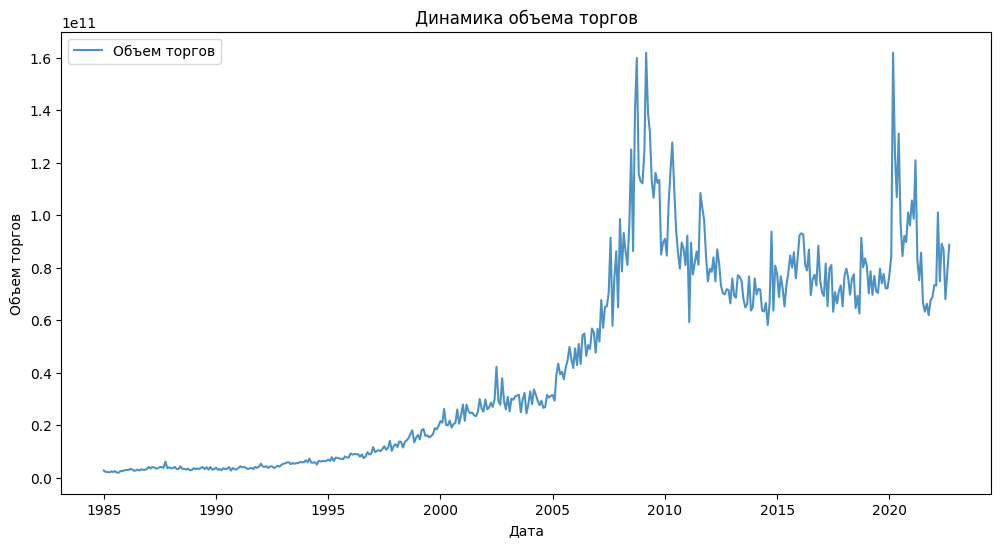

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Объем торгов', alpha=0.8)
plt.title('Динамика объема торгов')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.legend(loc='best')
plt.show()

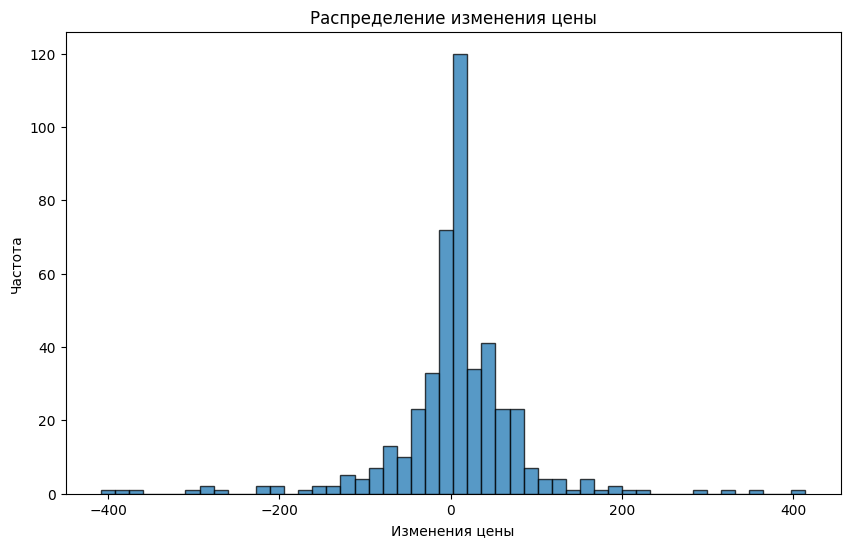

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price_Change'], bins=50, edgecolor='black', alpha=0.75)
plt.title('Распределение изменения цены')
plt.xlabel('Изменения цены')
plt.ylabel('Частота')
plt.show()

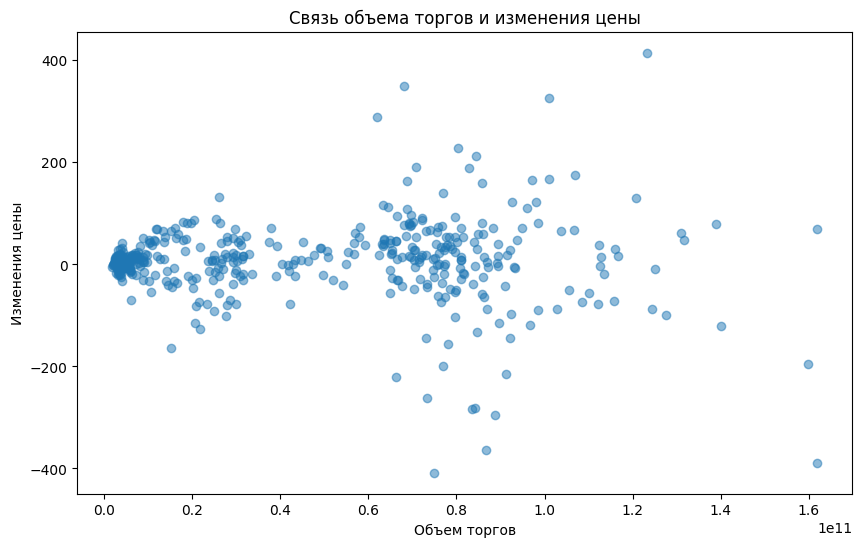

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Price_Change'], alpha=0.5)
plt.title('Связь объема торгов и изменения цены')
plt.xlabel('Объем торгов')
plt.ylabel('Изменения цены')
plt.show()

Анализ полученных результатов.
  1. Динамика открытия и закрытия цен:
   - В долгосрочной перспективе цены открытия и закрытия практически одинаковые
   - Виден глобальный восходящий тренд индекса SP 500, однако в 2008 и 2020 годах были значительные спады 
    
  2. Динамика объема торгов:
   - Объем торгов тоже увеличиваются с годами
   - В 2008 и 2020 годах заметен резкий рост объема торгов

  3. Распределение изменения цены:
   - Изменения цены следуют нормальному распределению с центром около 0
   - В редких моментах есть колебания цен (как положительные, так и отрицательные)

  4. Связь объема торгов и изменения цены:
   - Связь между объемом торгов и изменениями цены слабо выражена
   - Встречаются выбросы, которые при высоких объемах коррелируются с экстремальным измением цен (и положительные, и отрицательные)

Выводы:
  - Данные о ценах открытия и закрытия дают общее представление о трендах рынка
  - Объем торгов имеет значение в периоды высокой волатильности, когда происходят значительные изменения цен
  - 2008 и 2020 год являются экстремальными (2008 год - кризис, 2020 год - пандемия) для общего тренда



Доработаем с данными на этом этапе. Создадим переменную threshold, которая определяет порог для экстремальных изменений цены. 
Стандартное отклонение Price_Change умножим на 2, так как по закону нормального распределения примерно 95% всех данных попадают в диапазон от [-2 * (стандартное отклонение) ; 2 * (стандартное отклонение)]

In [66]:
threshold = data['Price_Change'].std() * 2
data['Extreme_Change'] = (data['Price_Change'].abs() > threshold)

extreme_periods = data[data['Extreme_Change']]
extreme_periods

,Date,Open,High,Low,Close,Volume,Price_Change,Extreme_Change
0,2022-09-01,3936.73,4119.28,3610.40,3640.47,88667050000,-296.26,True
1,2022-08-01,4112.38,4325.28,3954.53,3955.00,78088520000,-157.38,True
2,2022-07-01,3781.00,4140.15,3721.56,4130.29,68021140000,349.29,True
3,2022-06-01,4149.78,4177.51,3636.87,3785.38,86799060000,-364.40,True
5,2022-04-01,4540.32,4593.45,4124.28,4131.93,74784850000,-408.39,True
6,2022-03-01,4363.14,4637.30,4157.87,4530.41,100978320000,167.27,True
8,2022-01-01,4778.14,4818.62,4222.62,4515.55,73279440000,-262.59,True
9,2021-12-01,4602.82,4808.93,4495.12,4766.18,68699830000,163.36,True
11,2021-10-01,4317.16,4608.08,4278.94,4605.38,61874700000,288.22,True
12,2021-09-01,4528.80,4545.85,4305.91,4307.54,66268850000,-221.26,True


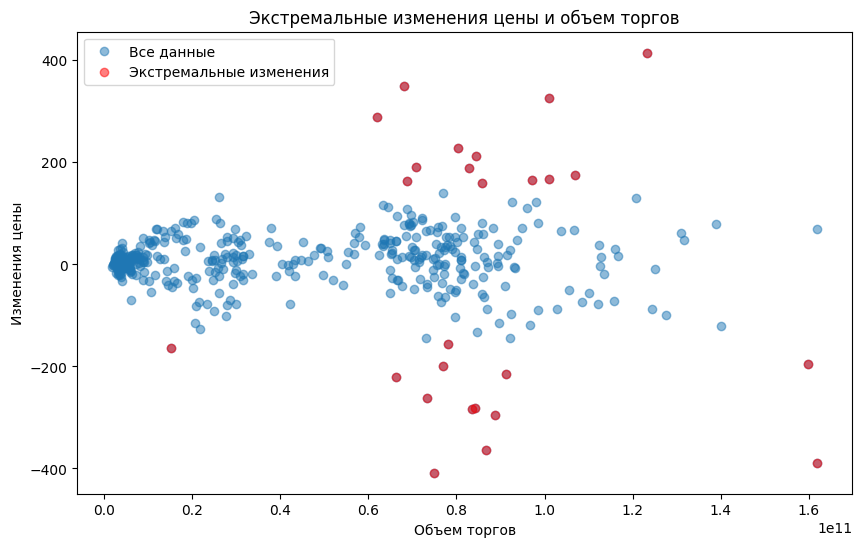

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Price_Change'], alpha=0.5, label='Все данные')
plt.scatter(extreme_periods['Volume'], extreme_periods['Price_Change'], alpha=0.5, label='Экстремальные изменения', color='red')
plt.title('Экстремальные изменения цены и объем торгов')
plt.xlabel('Объем торгов')
plt.ylabel('Изменения цены')
plt.legend(loc='best')
plt.show()

Экстремальные изменения чаще сопроваждаются высокими объемами торгов, что может свидетельствовать о сильноый рыночной активности или панике

4. Вычислим матрицу корреляции и построим heatmap с помощью библиотеки seaborn

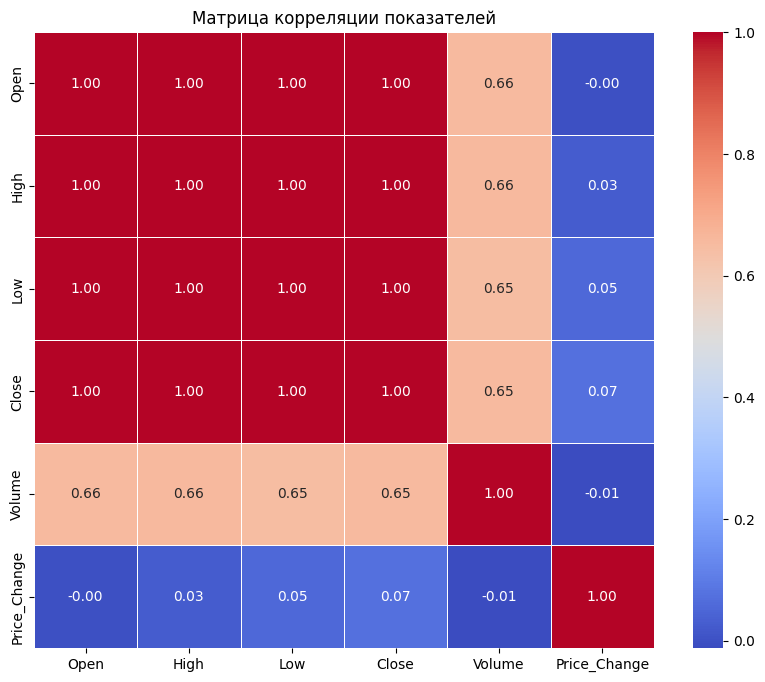

In [77]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change']].corr() # Не используем Date и Extreme_Change
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции показателей')
plt.show()

**Выводы по матрице корреляции**
  - Сильная корреляция между Open, High, Low, Close. Это из за того что эти значения за месяц тесно связаны между собой
  - Корреляция между Volume (объемами) и Open, High, Low, Close (ценами) находится в диапазоне 0.65-0.66. Указывает на положительную зависимость. Если будет рост цен, то объемы будут также увеличиваться
  - Корреляция между Price_Change и Volume практически не коррелируют друг с другом (-0.01). Показывает слабую связь между этми двумя параметрами.
  - Корреляция между Price_Change и ценами также низкая, в диапазоне от 0.00 до 0.07, что показывает, что Price_Change случайны и зависят от других факторов

``**Общий вывод по исследуемому датасету**``
**1) Взаимосвязь цен открытия/закрытия и объема**
- Объем торгов частично коррелирует с ценами, показывая, что периоды повышенных рыночных объемов могут сопровождаться ростом цен
- Изменения цены (Price_Change) практически не зависят от объема торгов

**2) Экстремальные изменения**
- Выявлены периоды с экстремальными изменениями цен, которые также часто сопровождаются высоким объемом торгов. Эти периоды обычно бывают вызваны какими-то внешними факторами (например, кризис или пандемия)

**3) Гипотеза о связи объема торгов с решением о покупке/продаже**
- Высокий объем торгов на фоне растущих цен может указывать на продолжение восходящего тренда
- Высокий объем торгов на фоне снижения цен может указывать на коррекцию или продаж из за внешних факторов

**Возможные способы применения полученных результатов**
- Создание индикаторов для торговли (основываясь объемом и ценами открытия/закрытия)
- Мониторинг экстремальных периодов (объем торгов превышает определенный порог, а изменения цены выходят за предел стандартного отклонения)